<a href="https://colab.research.google.com/github/safikhanSoofiyani/CS6910-Assignment1/blob/main/CS6910_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Feed Forward Neural Network</h1>

Work Done by:<br>
<ul> 
<li>Mohammed Safi Ur Rahman Khan - CS21M035 </li>
<li>Vamsi Sai Krishna Malineni  - OE20S302 </li>

<h3>Importing necessary libraries.</h3>

In [ ]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import copy 
from tqdm import tqdm
import random
import tensorflow as tf
import seaborn as sn

Various Links used till now:
<ul>
<li> L2 Regularization - https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd
</ul>

Installing and importing wandb

In [ ]:
!pip install wandb -qqq
import wandb

     |████████████████████████████████| 1.7 MB 10.0 MB/s 
     |████████████████████████████████| 181 kB 72.6 MB/s 
     |████████████████████████████████| 144 kB 11.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


<h3>Preparing dataset</h3>

In [ ]:
from sklearn.model_selection import train_test_split



def prepare_data():

  '''This function is used to load the data, define the class labels, performing
      the train-test-validation split, normalizing the data, flattening each data
      point, converting the class labels to one hot encoded vector.

      It return all the split data sets '''


  # Loading data from online source
  (train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

  # Defining labels for data
  num_classes = 10
  labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

  print("Number of data points in train data (initially) - ", len(train_x))
  print("Number of data points in test data (initially) - ", len(test_x))


  #performing the train-validation split
  train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=40)
  

  print("Shape of each image - 28x28" )
  image_shape=train_x.shape[1]*train_x.shape[2]
  print("shape of each image (1D) - ",image_shape)
  
  train_image_count=len(train_x)
  val_image_count = len(val_x)
  test_image_count=len(test_x)
  
  # Creating a matrix of image data 
  # each image is represented as a row by flattening the matrix: converting (60000,28,28) tensor to (60000,784) matrix
  X_train=np.zeros((train_image_count,image_shape))
  X_val=np.zeros((val_image_count,image_shape))
  X_test=np.zeros((test_image_count,image_shape))
  
  # converting the images into grayscale by normalizing
  for i in range(train_image_count):
    X_train[i]=(copy.deepcopy(train_x[i].flatten()))/255.0 
  for i in range(val_image_count):
    X_val[i]=(copy.deepcopy(val_x[i].flatten()))/255.0
  for i in range(test_image_count):
    X_test[i]=(copy.deepcopy(test_x[i].flatten()))/255.0
  


  #One hot encoding the label vectors to represent a probability distribution
  y_train = np.zeros((train_y.size, 10))
  y_train[np.arange(train_y.size), train_y] = 1

  y_val = np.zeros((val_y.size, 10))
  y_val[np.arange(val_y.size), val_y] = 1

  y_test = np.zeros((test_y.size, 10))
  y_test[np.arange(test_y.size), test_y] = 1

  

  
  return X_train,X_val,X_test,y_train,y_val,y_test,labels
  

Plotting images locally

In [ ]:
def plot_locally():
  xtrain,xval,xtest,ytrain,yval,ytest,labels=prepare_data()
  # Creating training dataset
  train=np.asarray(list(zip(xtrain,ytrain)))
  # plotting a single image from each class
  sample_images=[]
  wandb_arr=[]
  i=1
  plt.suptitle("Plotting image of each class from Fashion MNIST Dataset")

  while(len(sample_images)!=10):
    n=random.randrange(0,len(train))
    lab_index=np.asarray(np.nonzero(train[n][1]))[0][0]
    
    if(lab_index not in sample_images):
      plt.subplot(3,5,i)
      sample_images.append(lab_index)
      plt.title(labels[lab_index])
      plt.axis(False)
      plt.imshow(train[n][0].reshape((28,28)))
      i=i+1

Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


C:\Users\safik\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


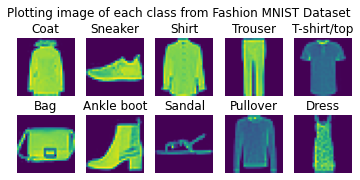

In [ ]:
plot_locally()

Plotting images via wandb

In [ ]:
#********** Plotting images via wandb************

# Enter the entity and project details from wandb.ai
wandb.init(entity="safi-vamsi-cs6910",project="Assignment 1", name="log_images")

# Loading dataset
xtrain,xval,xtest,ytrain,yval,ytest,labels=prepare_data()

# Creating training dataset
train=np.asarray(list(zip(xtrain,ytrain)))


sample_images=[]
wandb_arr=[]
i=1
plt.suptitle("Plotting image of each class from Fashion MNIST Dataset")
while(len(sample_images)!=10):
  n=random.randrange(0,len(train))
  lab_index=np.asarray(np.nonzero(train[n][1]))[0][0]
  if(lab_index not in sample_images):
    sample_images.append(lab_index)
    wandb_arr.append(wandb.Image(train[n][0].reshape((28,28)),caption=labels[lab_index]))
    i=i+1
wandb.log({"images":wandb_arr})
wandb.finish()


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


4431872/4422102 [==============================] - 0s 0us/step
Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = prepare_data()

Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


<h3> Defining Various Utility functions</h3>

<h4> Initialization Functions</h4>

In [ ]:

def Xavier(layer_sizes):
  params = {}
  for i in range(1,len(layer_sizes)):
      norm_xav=np.sqrt(6)/np.sqrt(layer_sizes[i]+layer_sizes[i-1])
      params["w"+str(i)]=np.random.randn(layer_sizes[i],layer_sizes[i-1])*norm_xav
      params["b"+str(i)]=np.zeros((layer_sizes[i],1))
  
  return params




In [ ]:
def Random(layer_sizes):
  params = {}
  for i in range(1,len(layer_sizes)):
      params["w"+str(i)]=0.01*np.random.randn(layer_sizes[i],layer_sizes[i-1])
      params["b"+str(i)]=0.01*np.random.randn(layer_sizes[i],1)

  return params

<h4> Activation Functions </h4>

In [ ]:
def sigmoid(pre_act):
  try:
    return (1.0/(1.0+np.exp(-pre_act)))
  except:
    print("error in sigmoid")

In [ ]:
def tanh(pre_act):
  return (np.tanh(pre_act))


In [ ]:
def relu(pre_act):
  return (np.maximum(0,pre_act))

In [ ]:
def softmax(x):
  try:
    return(np.exp(x)/np.sum(np.exp(x)))
  except:
    print("error in softmax")

<h4> Derivatives of Activation Functions </h4>

In [ ]:
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

In [ ]:
def tanh_derivative(x):
  return 1.0 -tanh(x)**2


In [ ]:
def relu_derivative(x):
  return 1. * (x>0)

In [ ]:
def softmax_derivative(x):
  return softmax(x) * (1-softmax(x))

In [ ]:
def derivative(A, activation):
  if activation == "sigmoid":
    return sigmoid_derivative(A)
  elif activation == "tanh":
    return tanh_derivative(A)
  elif activation == "relu":
    return relu_derivative(A)


<h4>Loss Functions</h4>

In [ ]:
def MSE(y, y_hat):
  error = np.sum(((y - y_hat)**2) / (2 * len(y)))
  return error

In [ ]:
def CrossEntropy(y, y_hat):
  error = - np.sum( np.multiply(y , np.log(y_hat)))/len(y)
  return error

In [ ]:

# Calculating loss 
def loss_calc(loss_name, y, y_hat, lambd, layer_sizes, parameters):
  error=0
  if(loss_name == "squared_loss"):
    error=MSE(y, y_hat)
  elif(loss_name == "cross_entropy"):
    error=CrossEntropy(y, y_hat)
    #error = -np.sum(np.sum(y_t*np.log(y_hat)))

  #For L2 Regularization
  regularized_error = 0.0
  for i in range(len(layer_sizes)-1, 0, -1):
    regularized_error += (np.sum(parameters["w"+str(i)]))**2
  regularized_error = error + ((lambd/(2*len(y)))*(regularized_error))


  return regularized_error

<h4> Accuracy <h4>



In [ ]:
def calc_accuracy(res,y_t):
    # res is the vector that comes 
    acc=0.0
    
    for x in range(len(res)):
      if(res[x].argmax()==y_t[x].argmax()):
        acc+=1
    acc=acc/len(y_t)
    return(acc*100)

In [ ]:
def calc_test_accuracy(y_pred,y_t):
  acc=0.0
  for i in range(len(y_pred)):
    if(y_pred[i]==y_t[i]):
      acc+=1
  acc=acc/len(y_t)
  return(acc*100)

<h2> Initialization of Neural Network</h2>

In [ ]:
def nn_init(layer_sizes, init_type = "random"):
  # Layer Sizes denotes the number of neurons per layer
  # 784 is for the input layer. 
  # 32 is for the hidden layers. 
  # 10 is for the output layers

  # initializing parameters for the neural network, 
  params={}
  if(init_type=="xavier"):
    params = Xavier(layer_sizes)

  elif(init_type=="random"):
    params = Random(layer_sizes)

  else:
    print("Enter a valid weight initilization type")

  return params


<h2> Forward Propagation</h2>

In [ ]:
def forward_prop(X,y,params,active,layer_sizes):
  
  # Extracting only the image data not the label for the image data
  out=copy.deepcopy(X)
  out=out.reshape(-1,1)
  
  #These are stored just to make it easy to keep track of the indices along with layers.
  h=[out] # To save the activations for each neuron in a layer
  a=[out] # To save the preactivation for each neuron in a layer

  if(active=="sigmoid"):
    for i in range(1,len(layer_sizes)-1):
      weights=params["w"+str(i)]
      biases=params["b"+str(i)]
      
      out=np.dot(weights,h[i-1])+biases
      a.append(out)
      post_a=sigmoid(out)
      h.append(post_a)
  
  elif(active=="tanh"):
    for i in range(1,len(layer_sizes)-1):
      weights=params["w"+str(i)]
      biases=params["b"+str(i)]
      
      out=np.dot(weights,h[i-1])+biases
      a.append(out)
      post_a=tanh(out)
      h.append(post_a)
  
  elif(active=="relu"):
    for i in range(1,len(layer_sizes)-1):
      weights=params["w"+str(i)]
      biases=params["b"+str(i)]
      
      out=np.dot(weights,h[i-1])+biases
      a.append(out)
      post_a=relu(out)
      h.append(post_a)       
  else:
    print("Enter a valid activation function") 

  # Final step for forward propagation, using softmax.
  weights=params["w"+str(len(layer_sizes)-1)]
  biases=params["b"+str(len(layer_sizes)-1)]
  
  out=np.dot(weights,h[len(layer_sizes)-2])+biases
  a.append(out)
  y_hat=softmax(out)
  h.append(y_hat)
  
  
  #in h we  are storing values for layers right from input till output
  #h0 is input
  #in a we are storing values for layers right from input till output
  #a0 is input

  return h,a,y_hat

<h2>Back Propagation</h2>

In [ ]:
def back_prop(y, y_hat, h, a, params, loss_type, layer_sizes, activation):
  
  #here both y_hat and y are assumed to be column vectors



  grad = {}

  if loss_type == "squared_loss":
    grad["dh"+str(len(layer_sizes)-1)] = (y_hat - y)
    grad["da"+str(len(layer_sizes)-1)] = (y_hat - y) * softmax_derivative(a[len(layer_sizes)-1])

  elif loss_type == 'cross_entropy':
    #Here actually it should be one hot vector. But y does the same job
    grad["da"+str(len(layer_sizes)-1)] = -(y-y_hat)
    grad["dh"+str(len(layer_sizes)-1)] = -(y/y_hat)

  for i in range(len(layer_sizes)-1, 0, -1 ):
    #print(i)
    #Not considering L2 Regularization here. Instead will cumulate in the update section
    grad["dw"+str(i)] = np.dot(grad["da"+str(i)], np.transpose(h[i-1]))
    grad["db"+str(i)] = grad["da"+str(i)]

    if i > 1:
      grad["dh"+str(i-1)] = np.dot(np.transpose(params["w"+str(i)]), grad["da"+str(i)])
      grad["da"+str(i-1)] = np.multiply(grad["dh" + str(i-1)], derivative(a[i-1],activation))
 
  return grad



Function to calculate gradients, batchwise

In [ ]:
def grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function):
  grads={}
  grads.clear()
  #iterate over all the points in the current batch
  for j in range(len(X)):
    y = np.reshape(Y[j], (-1,1))
    #Feed forward the data point
    h,a,y_hat = forward_prop(X[j], y, parameters, activation, layers)
    #backpropagate the error.
    new_grads = back_prop(y,y_hat, h,a, parameters, loss_function, layers, activation)
    #keep collecting the gradients for all the data (since vanilla GD)
    if j == 0:
      grads = copy.deepcopy(new_grads)
    else:
      for k in range(len(layers)-1,0,-1):
        grads["dw"+str(k)] += new_grads["dw"+str(k)]
        grads["db"+str(k)] += new_grads["db"+str(k)]
  
  return grads

<h2>Different Optimization Functions</h2>

<h3> Mini Batch Gradient Descent </h3>

In [ ]:
def mini_batch_gd(X_train, y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters):
  #parameters = nn_init(layers, 'random')
  
  grads={}
  
  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      grads = grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
      
    
      #Updating the parameters once every one batch
      for j in range(len(layers)-1,0,-1):
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - (eta * grads["dw"+str(j)])
        parameters["b"+str(j)] = parameters["b"+str(j)] - (eta * grads["db"+str(j)])

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                
    wandb.log(log_dict)

  return parameters, train_errors_list, val_errors_list


<h3> Momentum Based Gradient Descent </h3>

In [ ]:
def momentum_gd(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters ):
  #parameters = nn_init(layers, 'random')
  
  grads={}
  update_history = {}
  gamma = 0.9 #Not treating this as a hyperparameter

  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
      
      #Storing the update history for each parameter.
      if i == 0 :
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = eta*grads["dw"+str(j)]
          update_history["b"+str(j)] = eta*grads["db"+str(j)]
      else:
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = (gamma*update_history["w"+str(j)]) + (eta*grads["dw"+str(j)])
          update_history["b"+str(j)] = (gamma*update_history["b"+str(j)]) + (eta*grads["db"+str(j)])

    
      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
        parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                
    wandb.log(log_dict)

  return parameters, train_errors_list, val_errors_list


<h3> Nesterov Accelerated Gradient Descent</h3>

In [ ]:
def nesterov_gd(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters ):
 
  grads={}
  update_history = {}
  param_lookahead = {}
  gamma = 0.9 #not treating this as a hyperparameter.

  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      #If it is the first batch, we still dont have the previous history.
      #So, lookahead will be same as the current parameters
      if i==0:
        param_lookahead = copy.deepcopy(parameters)
      
      #If its not the first batch then we calculate lookahead according to
      #the formula.
      else:
        for j in range(len(layers)-1, 0, -1):
          param_lookahead['w'+str(j)] = parameters['w'+str(j)] + (gamma*update_history["w"+str(j)])
                                                                  

      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      grads=grad_calculate_batchwise(X,Y,param_lookahead,activation,layers,loss_function)
      
      #Storing the update history for each parameter.

      #If its the first batch, we dont have any update history yet. So, it will
      #be same as the eta*gradients
      if i == 0 :
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = eta*grads["dw"+str(j)]
          update_history["b"+str(j)] = eta*grads["db"+str(j)]
      
      #If its not the first batch, we cumulate the update history as per the 
      #formula.
      else:
        for j in range(len(layers)-1, 0, -1):
          update_history["w"+str(j)] = (gamma*update_history["w"+str(j)]) + (eta*grads["dw"+str(j)])
          update_history["b"+str(j)] = (gamma*update_history["b"+str(j)]) + (eta*grads["db"+str(j)])

    
      #Updating the parameters once every one batch with the update_history
      for j in range(len(layers)-1,0,-1):
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
        parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                
    wandb.log(log_dict)

  return parameters, train_errors_list, val_errors_list


<h3> RMSprop</h3>

In [ ]:
#*********code for rmsprop***************
def rmsprop(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters ):
    
  grads={}
  update_history = {}
  v={}

  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []
  
  # Initializing update_history
  for i in range(len(layers)-1,0,-1):
    update_history["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    update_history["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing v 
  for i in range(len(layers)-1,0,-1):
    v["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    v["b"+str(i)]=np.zeros((layers[i],1))
  
  beta = 0.9 
  epsilon=1e-8

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):
   
    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):
      grads.clear()

      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
        
      for iq in range(len(layers)-1,0,-1):
        v["w"+str(iq)]=beta*v["w"+str(iq)]+(1-beta)*grads["dw"+str(iq)]**2
        v["b"+str(iq)]=beta*v["b"+str(iq)]+(1-beta)*grads["db"+str(iq)]**2
          
        update_history["w"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(v["w"+str(iq)]+epsilon)),grads["dw"+str(iq)])
        update_history["b"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(v["b"+str(iq)]+epsilon)),grads["db"+str(iq)])

      for j in range(len(layers)-1,0,-1):
        parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
        parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                
    wandb.log(log_dict)

  return parameters, train_errors_list, val_errors_list





<h3> Adam </h3>

In [ ]:
#*********code for adam***************
def adam(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters ):
    
  grads={}
  update_history = {}
  v={}
  m={}

  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []

  # Initializing update_history
  for i in range(len(layers)-1,0,-1):
    update_history["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    update_history["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing m 
  for i in range(len(layers)-1,0,-1):
    m["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    m["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing v 
  for i in range(len(layers)-1,0,-1):
    v["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    v["b"+str(i)]=np.zeros((layers[i],1))
  
  beta1 = 0.9 
  beta2=0.999
  epsilon=1e-8

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):
      grads.clear()
      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
      
      for iq in range(len(layers)-1,0,-1):
          m["w"+str(iq)]=beta1*m["w"+str(iq)]+(1-beta1)*grads["dw"+str(iq)]
          m["b"+str(iq)]=beta1*m["b"+str(iq)]+(1-beta1)*grads["db"+str(iq)]
          
          v["w"+str(iq)]=beta2*v["w"+str(iq)]+(1-beta2)*(grads["dw"+str(iq)])**2
          v["b"+str(iq)]=beta2*v["b"+str(iq)]+(1-beta2)*(grads["db"+str(iq)])**2

          # Bias Correction:
          # calculating mt_hat and vt_hat for weights and biases 
          mw_hat=m["w"+str(iq)]/(1-np.power(beta1,t+1))
          mb_hat=m["b"+str(iq)]/(1-np.power(beta1,t+1))

          vw_hat=v["w"+str(iq)]/(1-np.power(beta2,t+1))
          vb_hat=v["b"+str(iq)]/(1-np.power(beta2,t+1))
          
          update_history["w"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vw_hat+epsilon)),mw_hat)
          update_history["b"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vb_hat+epsilon)),mb_hat)

      for j in range(len(layers)-1,0,-1):
          parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
          parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                
    wandb.log(log_dict)

  return parameters, train_errors_list, val_errors_list






<h3>NAdam</h3>

In [ ]:
#*********code for nadam***************

def nadam(X_train,y_train, eta, max_epochs, layers, mini_batch_size, lambd, loss_function, activation, parameters ):
    
  grads={}
  update_history = {}
  v={}
  m={}

  train_errors_list = []
  val_errors_list = []
  train_acc_list = []
  val_acc_list = []
  


  # Initializing update_history
  for i in range(len(layers)-1,0,-1):
    update_history["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    update_history["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing m 
  for i in range(len(layers)-1,0,-1):
    m["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    m["b"+str(i)]=np.zeros((layers[i],1))
  # Initializing v 
  for i in range(len(layers)-1,0,-1):
    v["w"+str(i)]=np.zeros((layers[i],layers[i-1]))
    v["b"+str(i)]=np.zeros((layers[i],1))
  
  beta1 = 0.9 
  beta2=0.999
  epsilon=1e-8

  #iterate till max epochs
  for t in tqdm(range(max_epochs)):


    #iterate over all batches
    for i in range(0, len(X_train), mini_batch_size):

      grads.clear()

      X = X_train[i:i + mini_batch_size]
      Y = y_train[i:i + mini_batch_size]
      
      grads=grad_calculate_batchwise(X,Y,parameters,activation,layers,loss_function)
 
      for iq in range(len(layers)-1,0,-1):
          m["w"+str(iq)]=beta1*m["w"+str(iq)]+(1-beta1)*grads["dw"+str(iq)]
          m["b"+str(iq)]=beta1*m["b"+str(iq)]+(1-beta1)*grads["db"+str(iq)]
          
          v["w"+str(iq)]=beta2*v["w"+str(iq)]+(1-beta2)*(grads["dw"+str(iq)])**2
          v["b"+str(iq)]=beta2*v["b"+str(iq)]+(1-beta2)*(grads["db"+str(iq)])**2

          # Bias Correction:
          # calculating mt_hat and vt_hat for weights and biases 
          mw_hat=m["w"+str(iq)]/(1-np.power(beta1,t+1))
          mb_hat=m["b"+str(iq)]/(1-np.power(beta1,t+1))

          vw_hat=v["w"+str(iq)]/(1-np.power(beta2,t+1))
          vb_hat=v["b"+str(iq)]/(1-np.power(beta2,t+1))
          
          update_history["w"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vw_hat+epsilon)),(beta1*mw_hat+(1-beta1)*grads["dw"+str(iq)]))*(1/(1-np.power(beta1,t+1)))
          update_history["b"+str(iq)]=eta*np.multiply(np.reciprocal(np.sqrt(vb_hat+epsilon)),(beta1*mb_hat+(1-beta1)*grads["db"+str(iq)]))*(1/(1-np.power(beta1,t+1)))

      for j in range(len(layers)-1,0,-1):
          parameters["w"+str(j)] = (1-((eta*lambd)/mini_batch_size))*parameters["w"+str(j)] - update_history["w"+str(j)]
          parameters["b"+str(j)] = parameters["b"+str(j)] - update_history["b"+str(j)]

    #Calculating train loss and accuracies
    res = predict(X_train,y_train,parameters, activation, layers)
    train_err = loss_calc(loss_function, y_train, res, lambd, layers, parameters )
    train_acc = calc_accuracy(res, y_train)
    train_errors_list.append(train_err)
    train_acc_list.append(train_acc)

    #Calculating validation loss
    res = predict(X_val, y_val, parameters, activation, layers)
    val_err = loss_calc(loss_function, y_val, res, lambd, layers, parameters )
    val_acc = calc_accuracy(res,y_val)
    val_errors_list.append(val_err)
    val_acc_list.append(val_acc)

    log_dict = {"Train_Accuracy": train_acc, "Validation_Accuracy": val_acc, \
                "Train_Loss": train_err, "Validation_loss": val_err, "epoch": t}
                
    wandb.log(log_dict)

  


  return parameters, train_errors_list, val_errors_list





<h2> Predict </h2>
Function to predict the labels after training the model

In [ ]:
def predict(X_train,y_train,parameters,activation,layer_sizes):

  '''This function is used to simple take a model parameters
      and run the data points using forward prop, and return the outputs 
      of all the input data points'''

  result = []

  for i in range(len(X_train)):
    h,a,y_hat = forward_prop(X_train[i], y_train[i], parameters, activation, layer_sizes)

    #converting y_hat to a 1d array to match with the y
    y_hat = y_hat.flatten()
    result.append(y_hat)
  
  return result


<h2>Fit</h2>
Function to train the neural network

In [ ]:
def fit(X_train, y_train, layer_sizes, learning_rate = 0.0001, initialization_type = "random", activation_function = "sigmoid", loss_function = "cross_entropy", mini_batch_Size = 32, max_epochs = 5, lambd = 0, optimization_function = mini_batch_gd): 



  parameters = nn_init(init_type = initialization_type, layer_sizes = layer_sizes)
  parameters, train_errors_list, val_errors_list = optimization_function(X_train, y_train,learning_rate, max_epochs, layer_sizes, mini_batch_Size, lambd, loss_function, activation_function, parameters)
  print(train_errors_list)
  print(val_errors_list)

  return parameters




<h2>Calling all the functions</h2>

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = prepare_data()

Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


In [ ]:
def train():

  config_defaults = {
      'number_hidden_layers': 2,
      'number_neurons': 32,
      'learning_rate': 0.001,
      'initialization_type': "xavier",
      'activation_function':'sigmoid',
      'mini_batch_size' : 64,
      'max_epochs': 5,
      'lambd': 0,
      'optimization_function': "adam"
      
  }

  wandb.init(config=config_defaults)
  config = wandb.config


  #Forming the layer_sizes i.e., the architecture of our neural network
  layer_sizes = [784]
  for i in range(config.number_hidden_layers):
    layer_sizes = layer_sizes + [config.number_neurons]
  layer_sizes  = layer_sizes + [10]

  learning_rate = config.learning_rate
  initialization_type = config.initialization_type
  activation_function = config.activation_function
  loss_function = "cross_entropy"
  mini_batch_size = config.mini_batch_size
  max_epochs = config.max_epochs
  lambd = config.lambd
  opt_fun = config.optimization_function

  if opt_fun == "adam":
    optimization_function = adam
  elif opt_fun == "nadam":
    optimization_function = nadam
  elif opt_fun == "mini_batch_gd":
    optimization_function = mini_batch_gd
  elif opt_fun == "momentum_gd":
    optimization_function = momentum_gd
  elif opt_fun == "nesterov_gd":
    optimization_function = nesterov_gd
  elif opt_fun == "rmsprop":
    optimization_function = rmsprop
  else:
    print("Wrong optimization function")
    exit()



  name_run = str(learning_rate) + "_" + initialization_type[0] + "_" + \
  activation_function[0] + "_" + str(mini_batch_size) + "_" + str(max_epochs) + \
  "_" + str(lambd) + "_" + opt_fun[:4]

  wandb.run.name = name_run

  parameters = fit(X_train, y_train, layer_sizes, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)

  
  wandb.run.save()
  wandb.run.finish()




In [ ]:
hyperparameters = {
    "learning_rate":{
       'values': [0.001, 0.0001]
    },

    "number_hidden_layers": {
        'values' : [3, 4, 5]
    },

    "number_neurons": {
       'values': [32, 64, 128]
    },

    "initialization_type": {
        'values' : ["xavier", "random"]
    },

    "activation_function": {
        'values': ["sigmoid", "tanh", "relu"]
    },

    "mini_batch_size": {
        'values': [16,32,64,128]
    },

    "max_epochs": {
        'values': [5, 10, 20]
    },

    "lambd": {
        'values': [0, 0.0005, 0.5]
    },

    "optimization_function": {
        'values': ["mini_batch_gd", "momentum_gd", "nesterov_gd", "rmsprop", "adam", "nadam"]
    }

}



sweep_config = {
    'method' : 'bayes',
    'metric' :{
        'name': 'Validation_Accuracy',
        'goal': 'maximize'
    },
    'parameters': hyperparameters
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="safi-vamsi-cs6910", project="Assignment 1")
wandb.agent(sweep_id, train)

<h2> Comparing Squared loss and Cross Entropy loss</h2>


In [ ]:
def compare():


  config_defaults = {
      'number_hidden_layers': 2,
      'number_neurons': 32,
      'learning_rate': 0.001,
      'initialization_type': "xavier",
      'activation_function':'sigmoid',
      'mini_batch_size' : 64,
      'max_epochs': 5,
      'lambd': 0,
      'optimization_function': "adam",
      'loss_function': "cross_entropy"
      
  }

  wandb.init(config=config_defaults)
  config = wandb.config


  #Forming the layer_sizes i.e., the architecture of our neural network
  layer_sizes = [784]
  for i in range(config.number_hidden_layers):
    layer_sizes = layer_sizes + [config.number_neurons]
  layer_sizes  = layer_sizes + [10]

  learning_rate = config.learning_rate
  initialization_type = config.initialization_type
  activation_function = config.activation_function
  loss_function = config.loss_function
  mini_batch_size = config.mini_batch_size
  max_epochs = config.max_epochs
  lambd = config.lambd
  opt_fun = config.optimization_function

  if opt_fun == "adam":
    optimization_function = adam
  elif opt_fun == "nadam":
    optimization_function = nadam
  elif opt_fun == "mini_batch_gd":
    optimization_function = mini_batch_gd
  elif opt_fun == "momentum_gd":
    optimization_function = momentum_gd
  elif opt_fun == "nesterov_gd":
    optimization_function = nesterov_gd
  elif opt_fun == "rmsprop":
    optimization_function = rmsprop
  else:
    print("Wrong optimization function")
    exit()



  name_run = str(learning_rate) + "_" + initialization_type[0] + "_" + \
  activation_function[0] + "_" + str(mini_batch_size) + "_" + str(max_epochs) + \
  "_" + str(lambd) + "_" + opt_fun[:4]

  wandb.run.name = name_run

  parameters = fit(X_train, y_train, layer_sizes, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)

  
  wandb.run.save()
  wandb.run.finish()

In [ ]:
hyperparameters = {
    "learning_rate":{
       'values': [0.001, 0.0001]
    },

    "number_hidden_layers": {
        'values' : [3, 4, 5]
    },

    "number_neurons": {
       'values': [32, 64, 128]
    },

    "initialization_type": {
        'values' : ["xavier", "random"]
    },

    "activation_function": {
        'values': ["sigmoid", "tanh", "relu"]
    },

    "mini_batch_size": {
        'values': [16,32,64]
    },

    "max_epochs": {
        'values': [5, 10, 15]
    },

    "lambd": {
        'values': [0, 0.0005, 0.5]
    },

    "optimization_function": {
        'values': ["mini_batch_gd", "momentum_gd", "nesterov_gd", "rmsprop", "adam", "nadam"]
    },

    "loss_function": {
        'values': ["cross_entropy", "squared_loss"]
    }


}



sweep_config = {
    'method' : 'random',
    'metric' :{
        'name': 'Validation_Accuracy',
        'goal': 'maximize'
    },
    'parameters': hyperparameters
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="safi-vamsi-cs6910",project="Assignment 1")
wandb.agent(sweep_id, compare, count = 50)

<h2> Confusion Matrix for Test Dataset

In [ ]:
  # NOTE: Change these values according to the observations
  # made from the parallel coordinate plot from wandb.ai. These are the best 
  # hyperparameters as observed.
  
  config_final_test = {
      'number_hidden_layers': 5,
      'number_neurons': 32,
      'learning_rate': 0.0001,
      'initialization_type': "xavier",
      'activation_function':'relu',
      'mini_batch_size' : 32,
      'max_epochs': 20,
      'lambd': 0,
      'optimization_function': "rmsprop",
      'loss_function': "cross_entropy"
      
  }

  wandb.init(config=config_final_test)
  config = wandb.config


  #Forming the layer_sizes i.e., the architecture of our neural network
  layer_sizes = [784]
  for i in range(config.number_hidden_layers):
    layer_sizes = layer_sizes + [config.number_neurons]
  layer_sizes  = layer_sizes + [10]

  learning_rate = config.learning_rate
  initialization_type = config.initialization_type
  activation_function = config.activation_function
  loss_function = config.loss_function
  mini_batch_size = config.mini_batch_size
  max_epochs = config.max_epochs
  lambd = config.lambd
  opt_fun = config.optimization_function

  if opt_fun == "adam":
    optimization_function = adam
  elif opt_fun == "nadam":
    optimization_function = nadam
  elif opt_fun == "mini_batch_gd":
    optimization_function = mini_batch_gd
  elif opt_fun == "momentum_gd":
    optimization_function = momentum_gd
  elif opt_fun == "nesterov_gd":
    optimization_function = nesterov_gd
  elif opt_fun == "rmsprop":
    optimization_function = rmsprop
  else:
    print("Wrong optimization function")
    exit()

  parameters_for_test = fit(X_train, y_train, layer_sizes, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)
  res = predict(X_test,y_test, parameters_for_test, activation_function, layer_sizes)
  
  # Converting the one hot encoded vectors back to label_id's
  y_t=[]
  for k in range(len(y_test)):
    y_t.append(y_test[k].argmax())

  y_pred=[]
  for k in range(len(res)):
    y_pred.append(res[k].argmax())

  test_accuracy=calc_test_accuracy(y_pred,y_t)
  wandb.log({"conf_mat":wandb.plot.confusion_matrix(preds=y_pred,y_true=y_t,class_names=labels),"Test Accuracy": test_accuracy}) 
  
  

In [ ]:
# Plotting confusion matrix on local machine :

def plot_local_confmat(y_true,y_pred):
  labs=np.unique(y_true)
  cmat=np.zeros((len(labs),len(labs)))

  for i in range(len(labs)):
    for j in range(len(labs)):
      cmat[i,j]=np.sum((y_true==labs[i])&(y_pred==labs[j]))
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_title("Confusion matrix for Test dataset")
  sn.heatmap(cmat,annot=True,xticklabels=labels,yticklabels=labels)
  plt.show()


<h2> Trials

In [ ]:

layer_sizes = [784,128,128,128,128,10]
learning_rate = 0.001
initialization_type = "xavier"
activation_function = "sigmoid"
loss_function = "squared_loss"
mini_batch_size = 32
max_epochs = 10
lambd = 0.0005 
optimization_function = nadam


X_train, X_val, X_test, y_train, y_val, y_test, labels = prepare_data()

parameters = fit(X_train, y_train, layer_sizes, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)

res = predict(X_train,y_train, parameters, activation_function, layer_sizes)
err = loss_calc(loss_function, y_train, res, lambd, layer_sizes, parameters)
acc= calc_accuracy(res,y_train)
print("Train loss is :",err)
print("Train accuracy:",acc)

res = predict(X_test,y_test, parameters, activation_function, layer_sizes)
err = loss_calc(loss_function, y_test, res, lambd, layer_sizes, parameters)
acc= calc_accuracy(res,y_test)
print("Test loss is :",err)
print("Test accuracy:",acc)

Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


 80%|████████  | 8/10 [09:43<02:25, 72.97s/it]


KeyboardInterrupt: ignored

In [ ]:

layer_sizes = [784,32,32,10]
learning_rate = 0.0001
initialization_type = "xavier"
activation_function = "sigmoid"
loss_function = "cross_entropy"
mini_batch_size = 32
max_epochs = 20
lambd = 0 
optimization_function = n_adam


X_train, X_val, X_test, y_train, y_val, y_test, labels = prepare_data()

parameters = fit(X_train, y_train, layer_sizes, learning_rate, initialization_type, activation_function, loss_function, mini_batch_size, max_epochs, lambd, optimization_function)

res = predict(X_train,y_train, parameters, activation_function, layer_sizes)
err = loss_calc(loss_function, y_train, res, lambd, layer_sizes, parameters)
print("Train loss is :",err)


res = predict(X_test,y_test, parameters, activation_function, layer_sizes)
err = loss_calc(loss_function, y_test, res, lambd, layer_sizes, parameters)
print("Test loss is :",err)


Number of data points in train data (initially) -  60000
Number of data points in test data (initially) -  10000
Shape of each image - 28x28
shape of each image (1D) -  784


100%|██████████| 20/20 [06:39<00:00, 19.96s/it]


[0.6088209769084224, 0.5523804249973134, 0.5285184353646958, 0.5142271645329473, 0.5042819353625889, 0.4967253705491029, 0.4906372046572024, 0.48552448917878577, 0.4810978723198597, 0.4771753414464648, 0.473636056563522, 0.47039626925518757, 0.4673958813740041, 0.46459051288077574, 0.461946598478084, 0.4594382354892736, 0.45704508862681054, 0.4547509564948635, 0.4525427658327407, 0.4504098500635978]
Train loss is : 0.4504098500635978
Test loss is : 0.4820588075482052
